In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/raw/AWS_Honeypot_marx-geo.csv")

In [4]:
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [6]:
df.describe()

,src,type,spt,dpt,latitude,longitude,Unnamed: 15
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000,83.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751,-77.027536
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739,0.011942
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000,-77.059600
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000,-77.036400
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000,-77.036400
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800,-77.014600
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700,-77.014600


In [9]:
df.dtypes

datetime        object
host            object
src              int64
proto           object
type           float64
spt            float64
dpt            float64
srcstr          object
cc              object
country         object
locale          object
localeabbr      object
postalcode      object
latitude       float64
longitude      float64
Unnamed: 15    float64
dtype: object

### Univariate Analysis

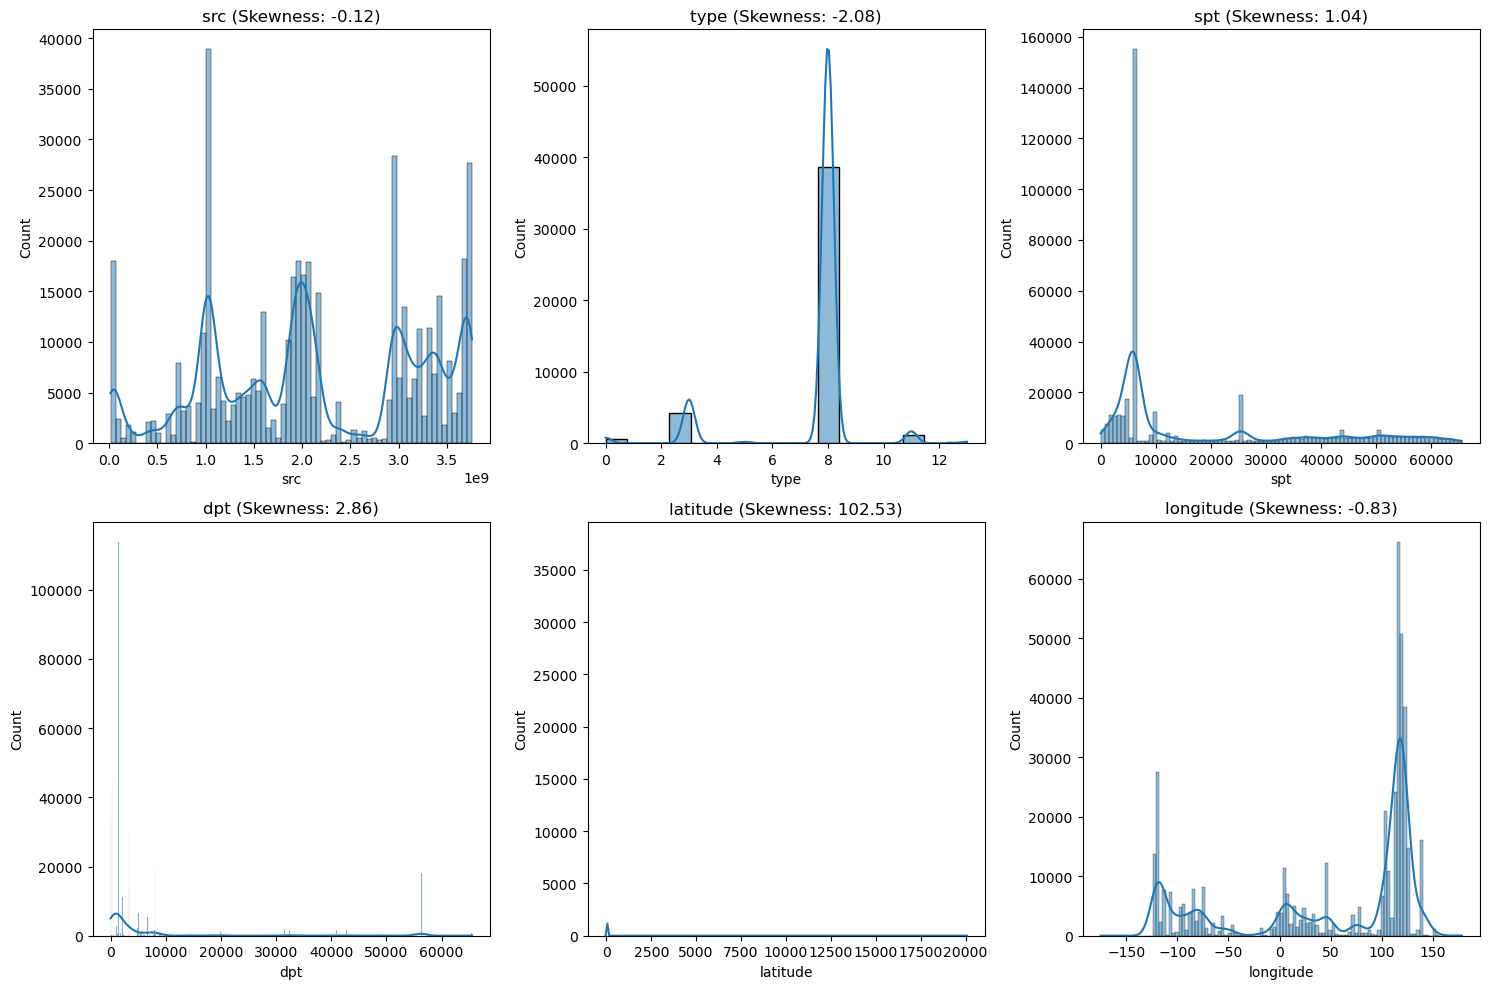

src           -0.118986
type          -2.081333
spt            1.037120
dpt            2.859764
latitude     102.531502
longitude     -0.831200
dtype: float64

In [10]:
# Calculating the skewness of each feature
to_drop = ['datetime', "host", "proto", "srcstr","cc","country","locale", "localeabbr", "postalcode", "Unnamed: 15"]
other_columns = df.drop(to_drop, axis=1).columns
feature_skewness = df[other_columns].skew()

# Plotting histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(other_columns, 1):  # Excluding the target variable
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} (Skewness: {feature_skewness[column]:.2f})')

plt.tight_layout()
plt.show()

feature_skewness

##### Observations from Skewness of each feature
- src (-0.118986)
- type (-2.081333)
- spt (1.037120)
- dpt (2.859764)
- latitude (102.531502)
- longitude (-0.831200)